# Import and Install

In [1]:
pip install git+https://github.com/csebuetnlp/normalizer -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install datasets -q

In [3]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from normalizer import normalize
from datasets import load_dataset
import torch
import numpy as np
import pandas as pd

# Loading Dataframe

In [4]:
df = pd.read_csv("/kaggle/input/openai-imdb-1k/openai_bengali_translation-1000.csv")
df = df.iloc[:1000]

In [5]:
df

,review,translated,sentiment
0,One of the other reviewers has mentioned that ...,"একজন অন্য রিভিউয়ার বলেছেন যে, কেবল 1 টি ওজ এপ...",positive
1,A wonderful little production. <br /><br />The...,একটি অসাধারণ ছোট প্রস্তুতি। <br /><br />ফিল্মি...,positive
2,I thought this was a wonderful way to spend ti...,আমি মনে করি এটি একটি অত্যন্ত গরম গ্রীষ্মকালীন ...,positive
3,Basically there's a family where a little boy ...,মূলত এখানে একটি পরিবার আছে যেখানে একটি ছোট ছেল...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...","পেটার মাটেইর ""লাভ ইন দ্য টাইম অব মানি"" দেখা এক...",positive
...,...,...,...
995,Nothing is sacred. Just ask Ernie Fosselius. T...,কোনও কিছু পবিত্র নয়। শুধু একটি উদাহরণ দিন এরন...,positive
996,I hated it. I hate self-aware pretentious inan...,আমি এটা ঘৃণা করছিলাম। আমি স্ব-সচেতন মিথ্যাবাদী...,negative
997,I usually try to be professional and construct...,আমি সাধারণভাবে চলচ্চিত্র সমীক্ষা করার সময়ে পে...,negative
998,If you like me is going to see this in a film ...,আপনি যদি আমার মতে এই চিত্রটি আপনার স্কুলের একট...,negative


In [6]:
from datasets import Dataset, DatasetDict
train_df, valid_df = train_test_split(df, test_size = 0.3)
val_df, test_df = train_test_split(valid_df, test_size = 0.5)

In [7]:
train_df

,review,translated,sentiment
338,Despite having an absolutely horrid script (mo...,যাদেরা এই চলচ্চিত্রটি দেখবেন তাদের জন্য এটি যত...,negative
862,From the decrepit ranks of the already over-sa...,পূর্ণভাবে অতিসতুর্য 'হিলিবিলি হরর' উপ-জাতির অপ...,negative
354,"Like the previous poster, I am from northern V...","আগের পোস্টারের মতো, আমি উত্তরী ভার্মণ্ট থেকে এ...",negative
439,EDMUND LOWE (who reminds me somewhat of Warren...,এডমন্ড লো (যিনি আমাকে কিছুটা ওয়ারেন উইলিয়ামে...,positive
878,When it was released this film caused a sensat...,যখন এই চলচ্চিত্রটি মুক্তি পেয়েছিল তখন এটি একট...,negative
...,...,...,...
352,Tell the truth I’m a bit stun to see all these...,সত্যিই আমি অবাক হয়ে গেছি এই অনেক সম্মাননীয় প...,negative
533,"DOCTEUR PETIOT, starring Michel Serrault, is a...","ডাক্তার পেটিও, যেখানে মিশেল সেরো প্রধান ভূমিকা...",positive
306,I consider myself a bit of a connoisseur of bo...,আমি নিজেকে বক্সিং চলচ্চিত্রের পণ্যবিদ মনে করি ...,positive
273,Fulci... Does this man brings one of the gorie...,ফুলচি... এই মানুষটি কি সবচেয়ে সংগ্রামী এবং অদ...,positive


# Tokenization

In [8]:
checkpoint = "csebuetnlp/banglabert_large"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/880 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [9]:
max_length = 256

In [10]:
train_encodings = tokenizer(
    [normalize(sentence) for sentence in train_df.translated], 
    truncation=True,
    padding=True,
    max_length=max_length
)

val_encodings = tokenizer(
    [normalize(sentence) for sentence in valid_df.translated], 
    truncation=True,
    padding=True,
    max_length=max_length
)

test_encodings = tokenizer(
    [normalize(sentence) for sentence in test_df.translated], 
    truncation=True,
    padding=True,
    max_length=max_length
)

In [11]:
class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [12]:
train_labels = [0 if row.sentiment == "positive" else 1 for idx, row in train_df.iterrows()]
train_dataset = SentimentDataset(train_encodings, train_labels)
val_labels = [0 if row.sentiment == "positive" else 1 for idx, row in valid_df.iterrows()]
val_dataset = SentimentDataset(val_encodings, val_labels)
test_labels = [0 if row.sentiment == "positive" else 1 for idx, row in test_df.iterrows()]
test_dataset = SentimentDataset(test_encodings, test_labels)

In [13]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

pytorch_model.bin:   0%|          | 0.00/1.35G [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at csebuetnlp/banglabert_large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=5,
    per_device_train_batch_size=16,
    learning_rate=4e-5,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,  
    evaluation_strategy="epoch",  
    save_strategy="epoch", 
    report_to=["none"]
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [15]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [16]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

# Training

In [17]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.704700,0.690413,0.583333,0.390244,0.754717,0.263158
2,0.652300,0.566433,0.790000,0.783505,0.820144,0.750000
3,0.414900,0.402024,0.843333,0.856269,0.800000,0.921053
4,0.304600,0.392360,0.870000,0.880734,0.822857,0.947368
5,0.320200,0.477851,0.843333,0.844884,0.847682,0.842105


TrainOutput(global_step=220, training_loss=0.4604451580481096, metrics={'train_runtime': 377.9542, 'train_samples_per_second': 9.26, 'train_steps_per_second': 0.582, 'total_flos': 1630879885824000.0, 'train_loss': 0.4604451580481096, 'epoch': 5.0})

# Result

In [18]:
eval_results = trainer.evaluate()

print("\n" + "="*40)
print("    Evaluation Results".center(40))
print("="*40)

for key, value in eval_results.items():
    print(f"{key.replace('_', ' ').title():<35}: {value:>8.4f}")

print("="*4)


             Evaluation Results         
Eval Loss                          :   0.4779
Eval Accuracy                      :   0.8433
Eval F1                            :   0.8449
Eval Precision                     :   0.8477
Eval Recall                        :   0.8421
Eval Runtime                       :   8.4063
Eval Samples Per Second            :  35.6870
Eval Steps Per Second              :   4.5200
Epoch                              :   5.0000
====


In [19]:
predictions_output = trainer.predict(test_dataset)

In [20]:
metrics = predictions_output.metrics

print("\n" + "="*40)
print("           Prediction Metrics".center(40))
print("="*40)

for key, value in metrics.items():
    print(f"{key.replace('_', ' ').title():<35}: {value:>8.4f}")

print("="*40)


                Prediction Metrics      
Test Loss                          :   0.4494
Test Accuracy                      :   0.8600
Test F1                            :   0.8489
Test Precision                     :   0.8429
Test Recall                        :   0.8551
Test Runtime                       :   4.2153
Test Samples Per Second            :  35.5850
Test Steps Per Second              :   4.5070


# Confusion Matrix

In [21]:
predictions_output = trainer.predict(val_dataset)

logits = predictions_output.predictions
true_labels = predictions_output.label_ids

predictions = logits.argmax(axis=-1)

Confusion Matrix:
[[125  23]
 [ 24 128]]


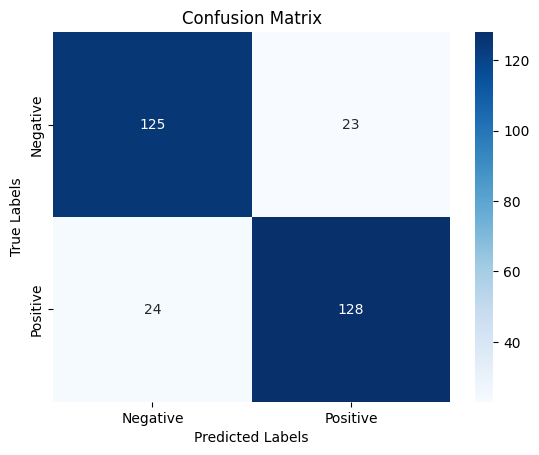

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = logits.argmax(axis=-1)

conf_matrix = confusion_matrix(true_labels, predictions)

print("Confusion Matrix:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()